In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [3]:
df = pd.read_csv(r"C:\Users\vinay\Downloads\archive (14)\heart.csv")

In [4]:
# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Split features (X) and target (y)
X = df.drop("target", axis=1)  
y = df["target"]  

In [7]:
# Standardize the features
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [8]:
# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Train the model
model = LogisticRegression()  
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# Precision Score
precision = precision_score(y_test, y_pred)

# Recall Score
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Probabilities for positive class

# Log Loss
logloss = log_loss(y_test, model.predict_proba(X_test))

In [12]:
# Print all metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Log Loss: {logloss:.2f}")

Accuracy: 0.80
Precision: 0.76
Recall: 0.87
F1 Score: 0.81
ROC-AUC Score: 0.88
Log Loss: 0.45


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



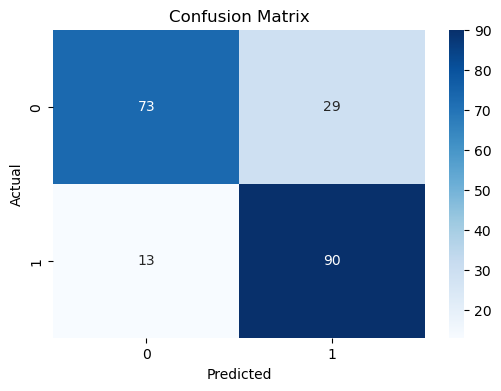

In [13]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

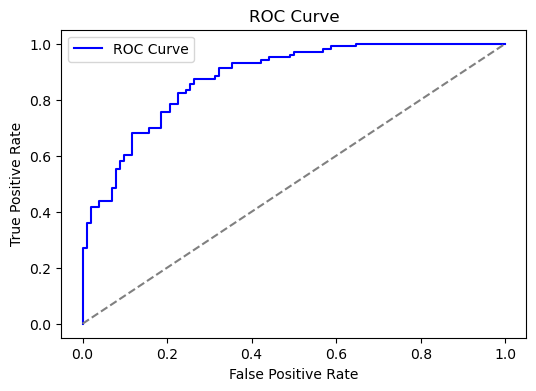

In [14]:
from sklearn.metrics import roc_curve

# Get probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label="ROC Curve")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()